In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from src.data.load_data import get_hackernews_files, load_hackernews_dataframe
from src.filters import use_n_most_occuring_users, get_users_with_more_than_n_comments

In [2]:
files = get_hackernews_files()
path = [x for x in files if x.endswith('HN_2017-01')][0]
df = load_hackernews_dataframe(path)

In [37]:
comments = df[df['type'] == 'comment']
user_df = use_n_most_occuring_users(comments, 500)

In [4]:
user_df = get_users_with_more_than_n_comments(user_df)

In [5]:
"""Train the LDA model on the comments"""
from src.models.corpus import HackernewsCorpus
from gensim import utils, models
from gensim.models.wrappers import ldamallet

comments_text = user_df['text']
corpus = HackernewsCorpus(comments_text)

2018-01-06 15:24:42,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-01-06 15:24:45,665 : INFO : adding document #10000 to Dictionary(26238 unique tokens: ['rrrazy', 'horsepower', 'staring', 'logn', 'concretely']...)
2018-01-06 15:24:48,506 : INFO : adding document #20000 to Dictionary(36377 unique tokens: ['rrrazy', 'microdose', 'horsepower', 'staring', 'logn']...)
2018-01-06 15:24:51,415 : INFO : adding document #30000 to Dictionary(44128 unique tokens: ['redmap', 'horsepower', 'staring', 'logn', 'concretely']...)
2018-01-06 15:24:54,232 : INFO : adding document #40000 to Dictionary(50444 unique tokens: ['redmap', 'horsepower', 'staring', 'logn', 'concretely']...)
2018-01-06 15:24:57,118 : INFO : adding document #50000 to Dictionary(56169 unique tokens: ['redmap', 'horsepower', 'staring', 'logn', 'concretely']...)
2018-01-06 15:24:57,839 : INFO : built Dictionary(57353 unique tokens: ['redmap', 'horsepower', 'staring', 'logn', 'concretely']...) from 52475 docum

In [6]:
# Train 10 LDA topics using MALLET
mallet_path = '/home/madness/Programs/mallet-2.0.6/bin/mallet'
model = models.wrappers.LdaMallet(mallet_path, corpus, num_topics=10, id2word=corpus.dictionary)

2018-01-06 15:24:58,079 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:25:17,089 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet
2018-01-06 15:25:21,294 : INFO : training MALLET LDA with /home/madness/Programs/mallet-2.0.6/bin/mallet train-topics --input /tmp/eaea88_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/eaea88_state.mallet.gz --output-doc-topics /tmp/eaea88_doctopics.txt --output-topic-keys /tmp/eaea88_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/eaea88_inferencer.mallet --doc-topics-threshold 0.0
2018-01-06 15:28:59,018 : INFO : loading assigned topics from /tmp/eaea88_state.mallet.gz


In [38]:
def predict_topic_class(modle, doc):
    bow = corpus.dictionary.doc2bow(utils.simple_preprocess(doc))
    return max(model[bow], key=lambda x: x[1])[0]

user_df = user_df.head(100)
user_df['topic'] = user_df.text.map(lambda x : predict_topic_class(model, x))

2018-01-06 15:50:14,592 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:50:14,595 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:50:17,962 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:50:18,814 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:50:18,816 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-sto

2018-01-06 15:51:01,476 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:51:02,338 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:51:02,340 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:51:06,531 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterat

2018-01-06 15:51:53,123 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:51:53,125 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:51:56,161 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:51:56,878 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:51:56,880 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-sto

2018-01-06 15:52:48,331 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:52:49,303 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:52:49,306 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:52:52,908 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterat

2018-01-06 15:53:51,529 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:53:51,532 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:53:55,891 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:53:56,916 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:53:56,919 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-sto

2018-01-06 15:54:58,843 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:54:59,653 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:54:59,655 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:55:03,765 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterat

2018-01-06 15:56:01,229 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:56:01,231 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:56:05,189 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:56:06,077 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:56:06,079 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-sto

2018-01-06 15:57:21,160 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:57:22,533 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:57:22,535 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:57:27,451 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterat

2018-01-06 15:58:31,816 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:58:31,819 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/eaea88_corpus.txt --output /tmp/eaea88_corpus.mallet.infer --use-pipe-from /tmp/eaea88_corpus.mallet
2018-01-06 15:58:37,248 : INFO : inferring topics with MALLET LDA '/home/madness/Programs/mallet-2.0.6/bin/mallet infer-topics --input /tmp/eaea88_corpus.mallet.infer --inferencer /tmp/eaea88_inferencer.mallet --output-doc-topics /tmp/eaea88_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0'
2018-01-06 15:58:38,242 : INFO : serializing temporary corpus to /tmp/eaea88_corpus.txt
2018-01-06 15:58:38,243 : INFO : converting temporary corpus to MALLET format with /home/madness/Programs/mallet-2.0.6/bin/mallet import-file --preserve-case --keep-sequence --remove-sto

In [51]:
from igraph import Graph
from src.graphbuilder import GraphBuilder
%load_ext autoreload
%autoreload 2
graph = Graph()
gb = GraphBuilder()
gb.extend_graph(user_df)

100it [00:00, 824.17it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


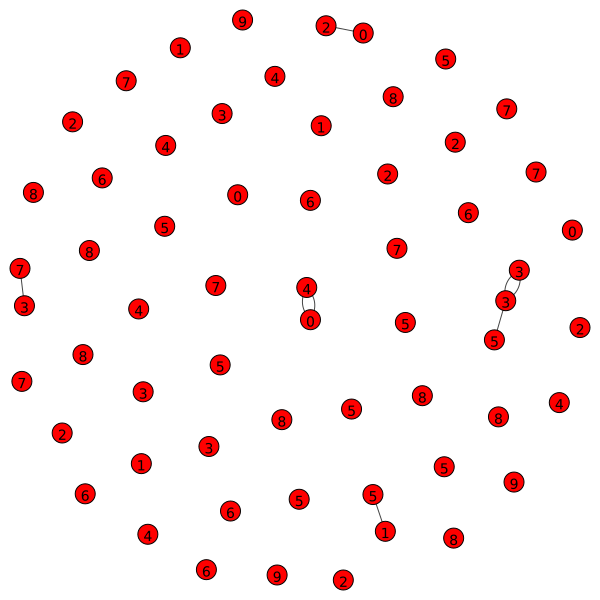

In [52]:
plot(gb.graph)